# Predicting heart disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has the heart disease based on their medical atttributes.

I am going to take the Following approcah:
1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defination

In a statement,
> Given Clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The orginal data came from the Cleavland data from uci machine learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also an another version available on Kaggle. 
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where we can get different information about each of the features in the data 

 **Create a Data dictionary**
 
* Age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

# Preparing the tools

I'am going to use Pandas, Matplotlib (Seaborn) and NumPy for the Data analysis and manipulation.


In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# I want the plots to appear inside the notebook

%matplotlib inline 

# Models from the Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with,

1. what Question's are you trying to solve?
2. What kind of data do we have and how do we treat diferent types>
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
4. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#  Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

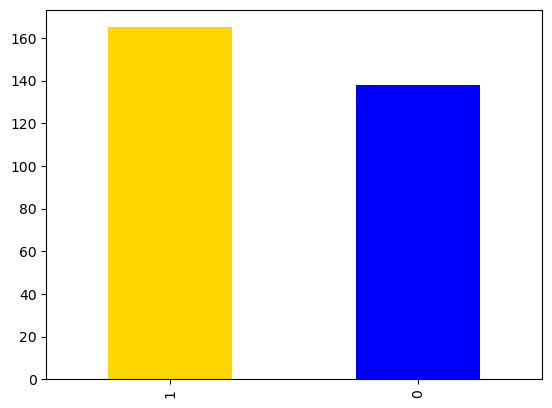

In [6]:
df["target"].value_counts().plot(kind="bar", color=["gold", "blue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:


df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


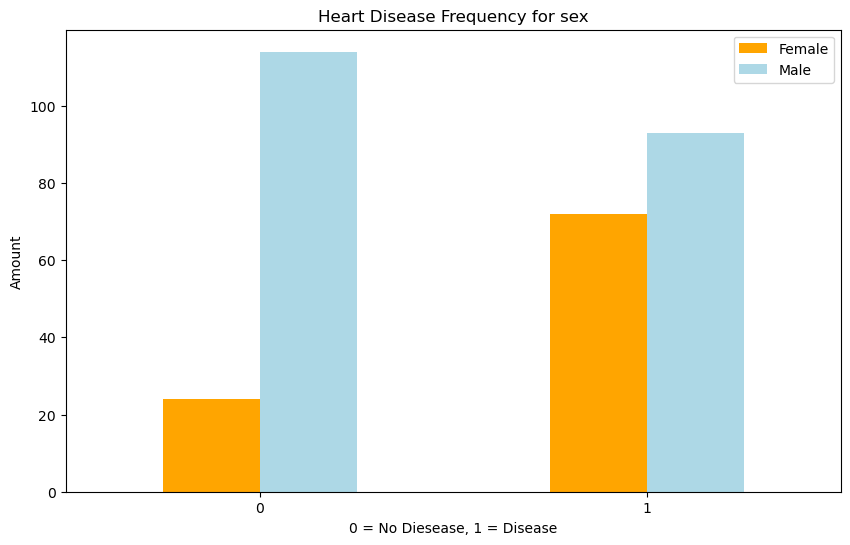

In [12]:
# Creata a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["orange", "lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Heart Disease frequency according to the age

In [13]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [14]:
# Comparing the age column with the target column
pd.crosstab(df.target, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


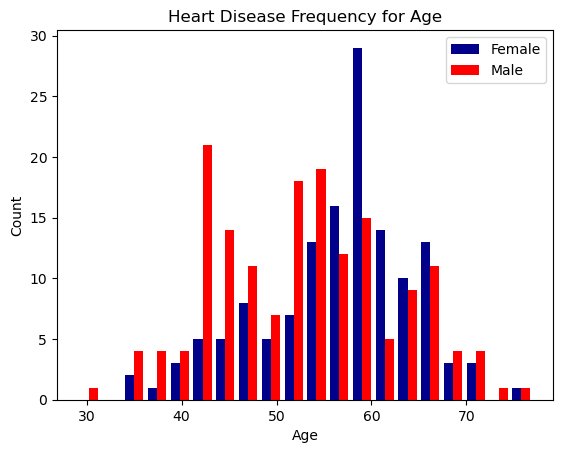

In [15]:
# Creata a plot of crosstab of the age and the target
# pd.crosstab(df.target, df.age).plot(kind="bar", figsize=(10, 8), color=["darkblue", "red"]);
plt.hist([df[df['target'] == 0]['age'], df[df['target'] == 1]['age']], 
         bins=20, color=['darkblue', 'red'])
plt.title("Heart Disease Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs max Heart rate for Heart Disease


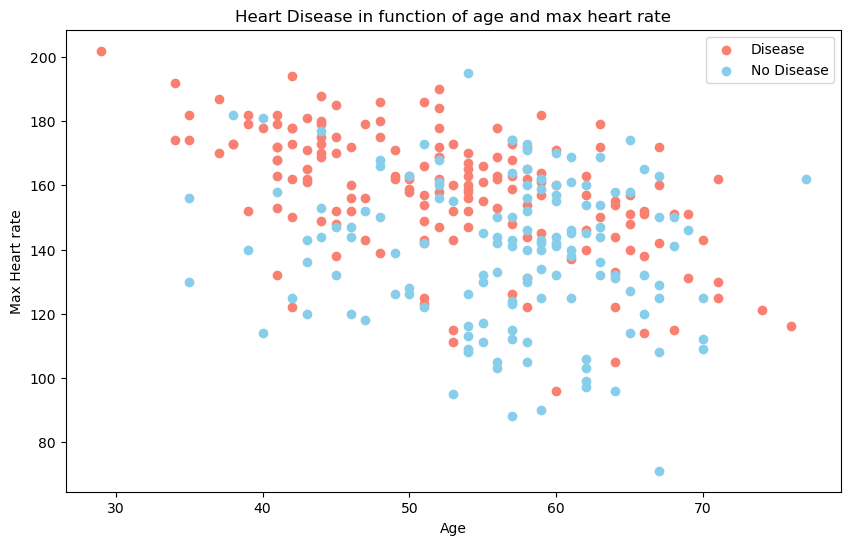

In [17]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scattet with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="skyblue");

# Add some helpful infp
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);


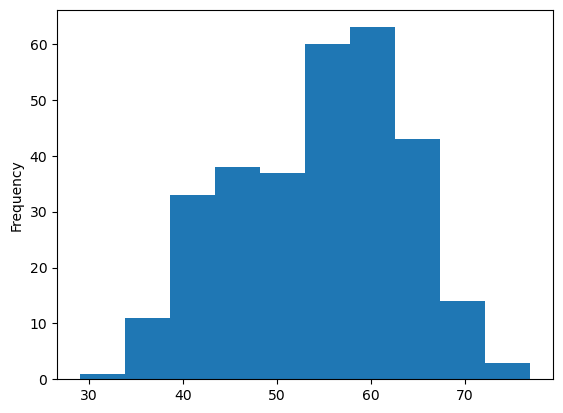

In [18]:
# Check the distribution of the gae column with a histogram
df.age.plot.hist();

 ## Heart Disease Frequency per chest pain type

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic


In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


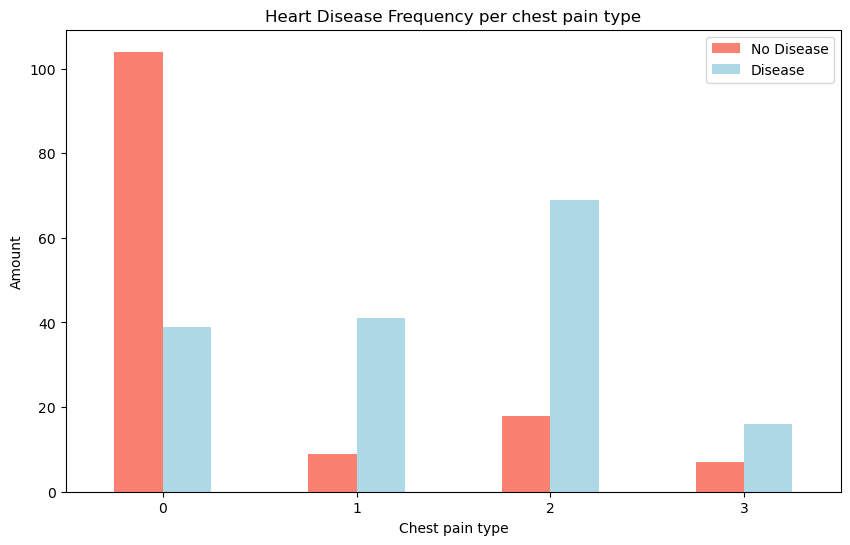

In [20]:
# Makeing the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
 # Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


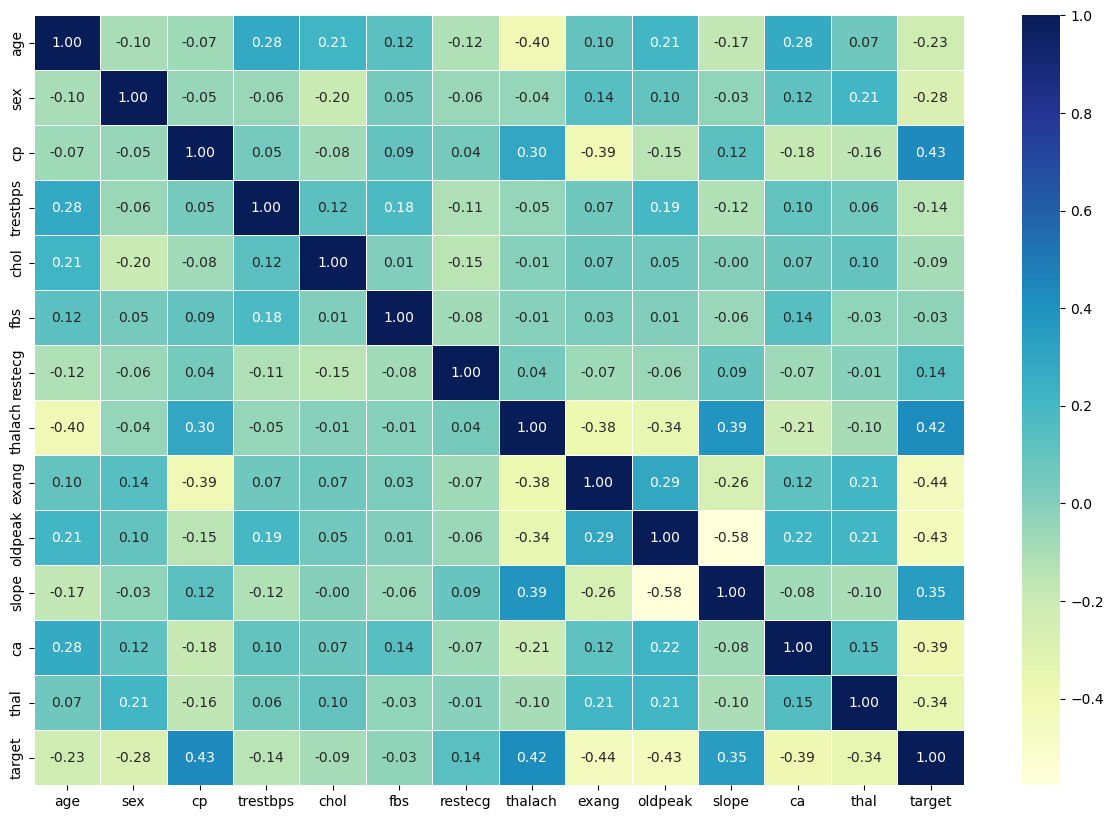

In [23]:
# Let's Make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

# 5. Modeling

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
# Split the data into x and y
x = df.drop("target", axis=1)
y = df["target"]


In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
# split the data into train and test
np.random.seed(49)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2


In [30]:
y_train

171    0
73     1
162    1
118    1
274    0
      ..
177    0
126    1
244    0
182    0
173    0
Name: target, Length: 242, dtype: int64

In [31]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y_test

181    0
144    1
188    0
250    0
46     1
      ..
52     1
27     1
199    0
4      1
270    0
Name: target, Length: 61, dtype: int64

Now we've got our data split into the training and test sets, it's time to build a machine learning model

we'll train it and find the pattern on the training sets

and then test it to use the patterns find on the traing sets for testing in the test sets

I am going to try three different machine learning models:

* Logistic Regression
* k-Nearest Neighbours Classidier
* Random  Forest Classifier



In [61]:
# Put modles in a dictionaly

models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differnt scikit -learn machine learning models
    x_train: training data (no labels)
    x_Test : testing data (no labels)
    y_train : training data
    y_test : testing data
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_Scores
        model_scores[name]= model.score(x_test, y_test)
    return model_scores

    

In [62]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

G:\Data science practice\Heart disease project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8360655737704918}

### Model Comparison


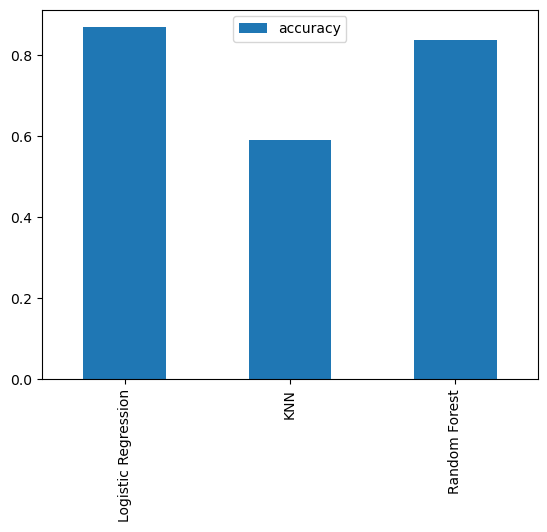

In [63]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. what should do?

let's look at the following,

1. Hyperparameter tuning
2. Feature importace
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

### Hyperparameter tuning

In [47]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for N Neighbors
neighbors = range(1, 21)

# Setup KNN Instance

knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))
    

In [48]:
train_scores

[1.0,
 0.8140495867768595,
 0.7975206611570248,
 0.7644628099173554,
 0.7479338842975206,
 0.7603305785123967,
 0.743801652892562,
 0.7355371900826446,
 0.7272727272727273,
 0.7024793388429752,
 0.7231404958677686,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752,
 0.6900826446280992,
 0.6983471074380165,
 0.6735537190082644,
 0.6983471074380165,
 0.6900826446280992,
 0.7024793388429752]

In [49]:
test_scores

[0.5245901639344263,
 0.5409836065573771,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312]

Maximum KNN score on the test data: 65.57%


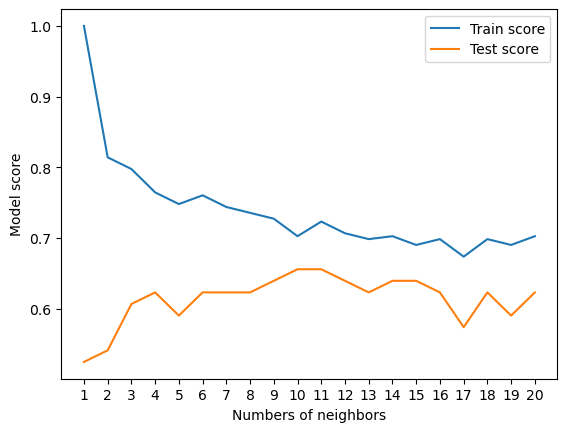

In [50]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Numbers of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## HyperParameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [51]:
# Creat a hyperparameter grid for the LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}  
# Create a hyperparameter Grid for RandonForestClassifier

rf_grid = {"n_estimators" : np.arange(10, 100, 50),
            "max_depth" : [None, 3, 5, 10],
            "min_samples_split" : np.arange(2, 20, 2),
            "min_samples_leaf" : np.arange(1, 20, 2)}

Now we have got Hyperparameter grids setup for each of our models, 
let's tune them using RandomizedSearchCv

In [52]:
  # Tune LogisticRegression

np.random.seed(49)

# Setup random hyperparmeter search For LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit the Random Hyperparameter search model for LogisticRegression

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [54]:
rs_log_reg.score(x_test, y_test)

0.8688524590163934

Now we have tuned the LogisticRegression , let's do the same for the RandomForestClassifier

In [55]:
# setup Random seed

np.random.seed(49)

# setup random hyperpameter search for RandomForestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit the random hyperparameter search model for the RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [56]:
# Find the beat hyperparameters 
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [57]:
# Evaluate the Randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8360655737704918

In [64]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

since our LogisticRegression model provides the best scores so far, we'll try and improve tgem again using GridSearchCv

In [65]:
# Different Hyperparameters for our Logisticregression
log_reg_Grid = {"C": np.logspace(-4, 4, 30),
                 "solver" : ["liblinear"]}

# set up Grid Hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)

# Fit the Grid Hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [66]:
# check the best Hyperparameter
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [67]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8688524590163934

In [68]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8360655737704918}

## Evaluting our tuned machine learning Classifier, beyond accuracy

* ROC curve and AUC score 
* Confusion matrix
* Classification report
* precision 
* Recall
* F1 Score 

....and It would be great if cross-validation was used where possible

To make comparisons and eavlauate our trained model , first we need to make predictions.

In [69]:
# Make Predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [70]:
y_preds

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [71]:
y_test

181    0
144    1
188    0
250    0
46     1
      ..
52     1
27     1
199    0
4      1
270    0
Name: target, Length: 61, dtype: int64

0.9302832244008714

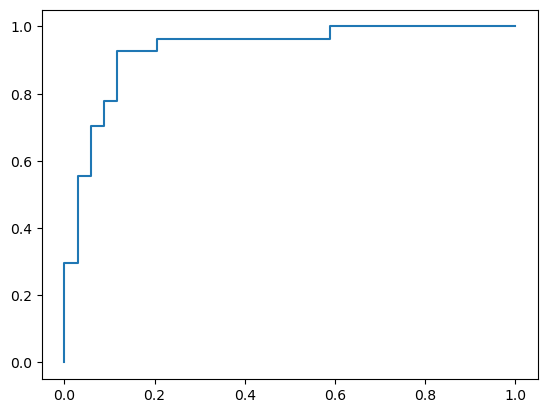

In [88]:
# Plot ROC curve and Calculate AUC metric
y_scores = gs_log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc);
roc_auc


In [89]:
# Confusion matric
print(confusion_matrix(y_test, y_preds))

[[27  7]
 [ 1 26]]


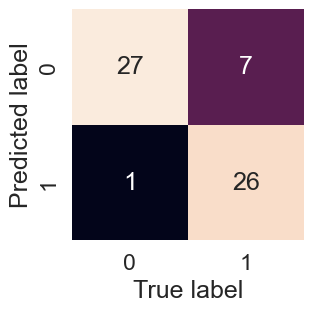

In [91]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax =plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

Now we have got a ROc Curve, an Auc metric and a confusion matrix, let's get a classification report as well as cross-validated precision, reall and f1 score

In [93]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.79      0.96      0.87        27

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



### Calculate Evaluation metrics using cross-validation

we're going to calculate accuracy, precision, recall and f1 score of our model using cross-validation and to do so we'l be using cross_val_score()

In [95]:
# Check best Hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [96]:
# Create a new clssifier with best parameters
clf = LogisticRegression(C=0.6158482110660260, solver="liblinear")

In [97]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.75      ])

In [98]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249180327868852

In [100]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8122549019607843

In [101]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.890909090909091

In [103]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8481221874318333

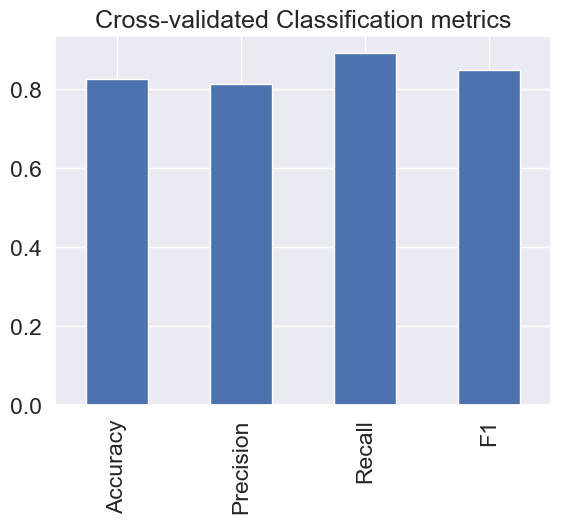

In [105]:
# Visualize Cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc, "Precision" : cv_precision, "Recall" : cv_recall, "F1" : cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics", legend=False);

### Feature Importance

Feature importance is another as asking, " Which features contibited most to the outcomes of the model and how did they contribute ? "

Finding Feature importance is different for each machine learning model. one way to find feature importance is to search for "(Model name)" feature importance

Let's find the feature importance for our Logistic regression Model

In [109]:
# Fit an instance Of LogisticRegression 

clf = LogisticRegression(C=0.615848211066026, solver="liblinear")
clf.fit(x_train, y_train);

In [112]:
 # Check coef
clf.coef_

array([[ 1.95865162e-03, -9.52625783e-01,  7.01573999e-01,
        -1.00415277e-02, -4.74587599e-04,  1.00270699e-01,
         3.46123723e-01,  2.45252613e-02, -5.61928601e-01,
        -6.22697229e-01,  4.66282332e-01, -6.25398310e-01,
        -8.79159155e-01]])

In [113]:
# Match Coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.001958651617589285,
 'sex': -0.9526257825805396,
 'cp': 0.7015739992978745,
 'trestbps': -0.010041527715344207,
 'chol': -0.00047458759941997774,
 'fbs': 0.10027069932326446,
 'restecg': 0.3461237227207116,
 'thalach': 0.024525261324606043,
 'exang': -0.5619286010673024,
 'oldpeak': -0.6226972293422587,
 'slope': 0.4662823324553465,
 'ca': -0.6253983096481887,
 'thal': -0.8791591545151847}

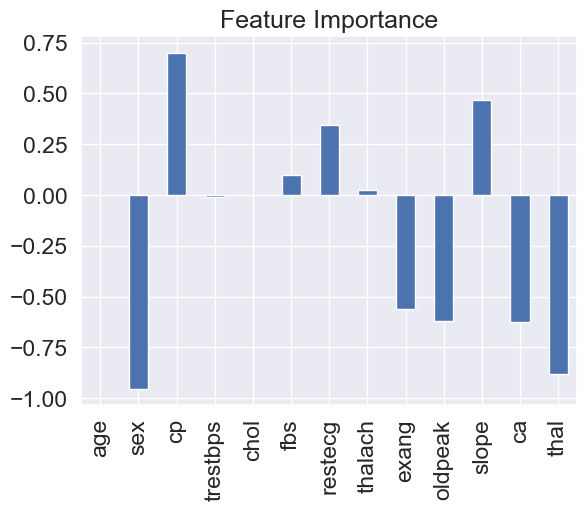

In [114]:
# Visualize Feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [115]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [120]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet..

* could you collect more data?
* could you try a better model? Like catBoost or XGBoost?
* could you improve the current models? ( By the Hyperparameter tuning)
* If your model is good enough ( you have hit your evaluation metric)
* share to client 

